radius: 67
minVal: 183.0 
maxVal: 243.0


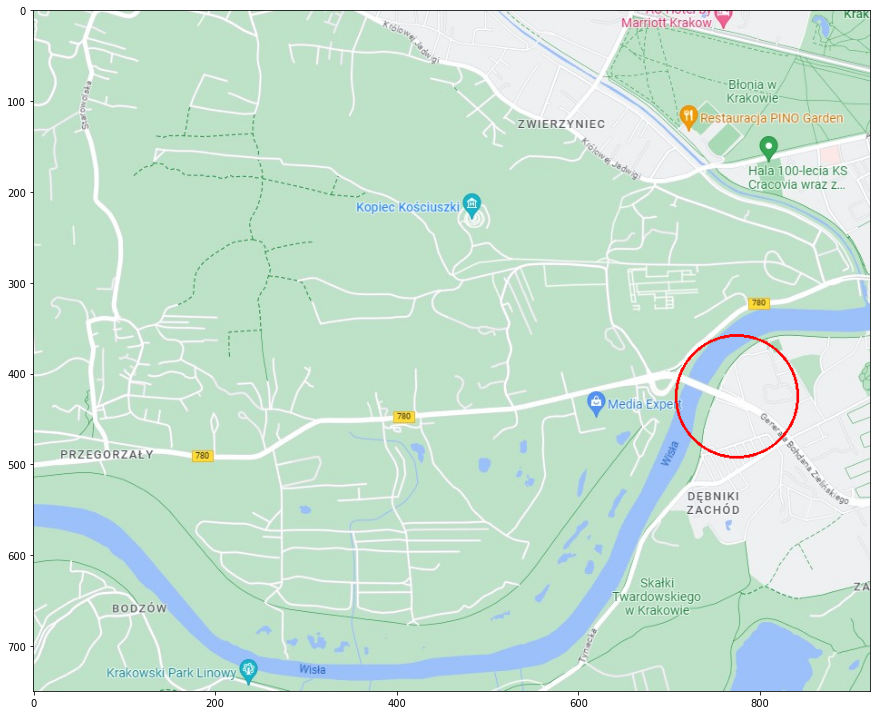

In [131]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
import cv2

plt.rcParams["figure.figsize"] = [15, 15]

# load the image and convert it to grayscale
image = cv2.imread("../test4.jpg")
if image is None:
    print("No image found!")
(height, width, channels) = image.shape
average_image_size = int(np.ceil((height + width) / 2))

orig = image.copy()
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
grayBlurred = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# apply a Gaussian blur to the image to average out noise, then find the brightest region
imagePercentage = 0.08
radius = int(np.ceil(average_image_size * imagePercentage) // 2 * 2 + 1)
print(f"radius: {radius}")
grayBlurred = cv2.GaussianBlur(grayBlurred, (radius, radius), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(grayBlurred)
imageWithCircle = orig.copy()
cv2.circle(imageWithCircle, maxLoc, radius, (255, 0, 0), 2)
# display brightest found region
plt.imshow(imageWithCircle)
print(f"minVal: {minVal} \nmaxVal: {maxVal}")

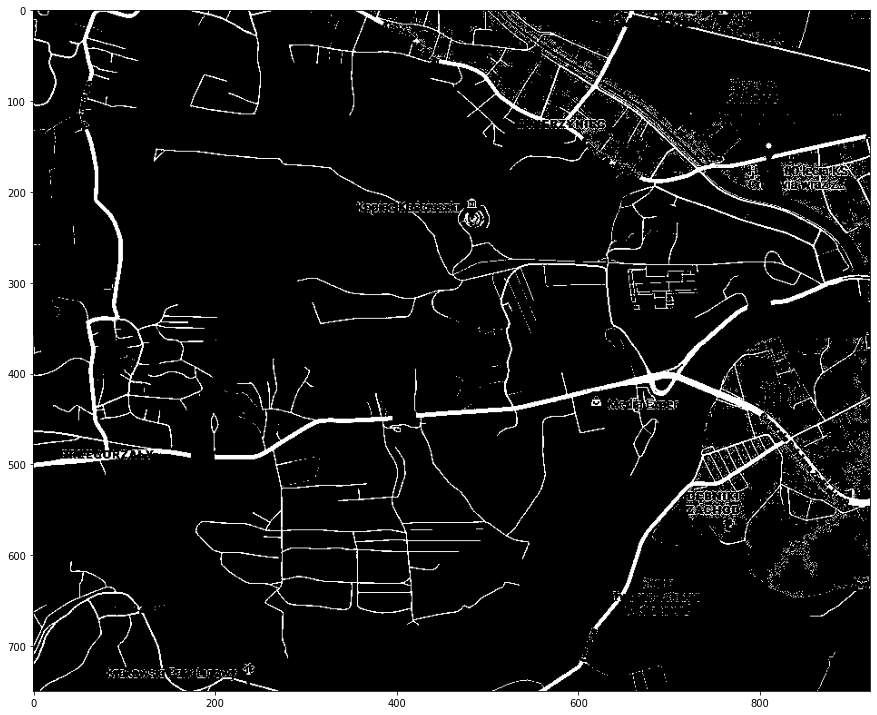

In [132]:
#apply treshold
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
(T, thresh) = cv2.threshold(gray, maxVal, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")

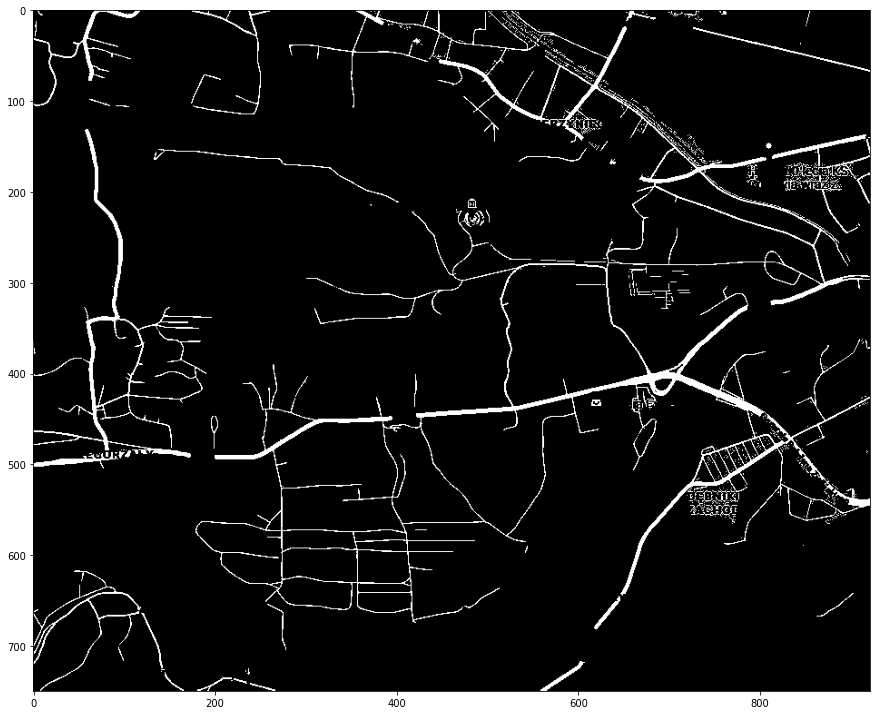

In [133]:
# denoising
image_cleared = np.array(thresh)
for i in range(3):
    image_cleared = cv2.fastNlMeansDenoising(image_cleared, None, 60, 8, int(average_image_size * 0.01))
    image_cleared = np.where(image_cleared < 125, 0, image_cleared)
    image_cleared = np.where(image_cleared >= 125, 255, image_cleared)
thresh = image_cleared
plt.imshow(thresh, cmap='gray')

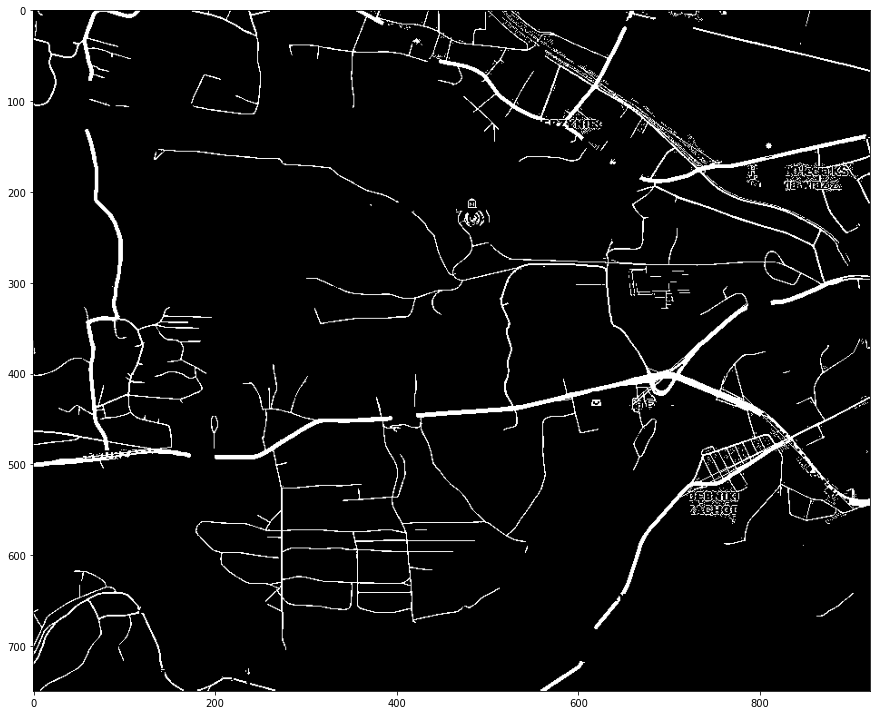

In [134]:
#Connect broken lines
lines = cv2.HoughLinesP(thresh, rho=1, theta=np.pi/180, threshold=30,
                            minLineLength=int(average_image_size * 0.15), maxLineGap=np.ceil((height + width) / 2 * 0.02))
for line in lines:
    cv2.line(thresh, (line[0][0], line[0][1]), (line[0][2],line[0][3]), (255,0,0), 1)
plt.imshow(thresh, cmap='gray')